Завдання (крок за кроком)

1. Завантажте та ознайомтесь з даними:
Завантажте набір даних Breast Cancer за допомогою функції load_breast_cancer() з бібліотеки sklearn.
Перегляньте опис набору даних, щоб зрозуміти структуру та характеристики.
2. Створіть DataFrame:
Створіть DataFrame, використовуючи дані з набору Breast Cancer.
3. Виведіть інформацію про дані:
Використовуйте функцію info() для виведення інформації про типи стовпців та кількість непустих значень в кожному стовпці.
4. Виведіть описові статистики:
Використовуйте функцію describe() для виведення описових статистик даних.
5. Стандартизуйте дані:
Застосуйте процес стандартизації даних за допомогою функцій з конспекту або бібліотеки sklearn.
6. Побудуйте точкові діаграми:
Використайте функцію pairplot() з бібліотеки seaborn для побудови точкових діаграм між усіма стовпцями.
7. Обчисліть матриці відстаней:
Використовуйте алгоритми та функції з конспекту для обчислення матриці відстаней для різних метрик: cityblock, cosine, euclidean, l1, manhattan.
8. Візуалізуйте отримані матриці:
Використайте функцію heatmap з бібліотеки seaborn або інші методи візуалізації для представлення отриманих матриць відстаней.
9. Зробіть висновок:
Зробіть висновок на основі аналізу отриманих результатів та порівняйте ефективність різних метрик відстаней для даного набору даних.


In [42]:
# 1. Завантажте та ознайомтесь з даними: Завантажте набір даних Breast Cancer за допомогою функції load_breast_cancer() з бібліотеки sklearn. Перегляньте опис набору даних, щоб зрозуміти структуру та характеристики.
import pandas as pd
from sklearn.datasets import load_breast_cancer

lbc = load_breast_cancer()
print("\nРозмірність даних:")
print(lbc.data.shape)
print("\nНазви характеристик:")
print(lbc.feature_names)
print("\nНазви класів:")
print(lbc.target_names)
# print(lbc.DESCR)


Розмірність даних:
(569, 30)

Назви характеристик:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Назви класів:
['malignant' 'benign']


Характеристики набору даних:
*   Кількість зразків: 569
*   Кількість атрибутів: 30 числових атрибутів плюс мітка класу
*   Відсутні значення: Нема
*   Розподіл класів: 212 злоякісних, 357 доброякісних

In [43]:
# 2. Створення DataFrame з атрибутів та цільових значень
df = pd.DataFrame(data=lbc.data, columns=lbc.feature_names)
# # Додавання стовпця з цільовими значеннями
df['target'] = lbc.target
print(df.shape)

# target_label (якщо треба)
# df['target_label'] = df['target'].apply(lambda x: lbc.target_names[x])

df.head()

(569, 31)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

In [44]:
# 3. Виведіть інформацію про дані: Використовуйте функцію info() для виведення інформації про типи стовпців та кількість непустих значень в кожному стовпці.
print("Інформація про дані:")
print(df.info())

Інформація про дані:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoot

In [45]:
# 4. Виведіть описові статистики: Використовуйте функцію describe() для виведення описових статистик даних.

# Вивід описових статистик
print("Описові статистики:")
df.describe()

Описові статистики:


mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst texture  \
count     569.000000              569.000000  ...     569.000000   
mean        0.181162                0.062798  ...      25.677223   
std         0.027414                0.007060  ...       6.146258   
min         0.106000                0.049960  ...      12.020000   
25%         0.161900                0.057700  ...      21.080000   
50%         0.179200                0.061540  ...      25.410000   
75%         0.195700                0.066120  ...      29.720000   
max         0.304000                0.097440  ...      49.540000   

       worst perimeter   worst area  worst smoothness  worst compactness  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       worst concavity  worst concave points  worst symmetry  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       worst fractal dimension      target  
count               569.000000  569.000000  
mean                  0.083946    0.627417  
std                   0.018061    0.483918  
min                   0.055040    0.000000  
25%                   0.071460    0.000000  
50%                   0.080040    1.000000  
75%                   0.092080    1.000000  
max                   0.207500    1.000000  

[8 rows x 31 columns]

In [46]:
# 5. Стандартизуйте дані: Застосуйте процес стандартизації даних за допомогою функцій з конспекту або бібліотеки sklearn.

def data_scale(data, scaler_type='norm'):
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import Normalizer
    if scaler_type == 'minmax':
        scaler = MinMaxScaler()
    if scaler_type == 'std':
        scaler = StandardScaler()
    if scaler_type == 'norm':
        scaler = Normalizer()

    scaler.fit(data)
    res = scaler.transform(data)
    return res


# Беремо дані для обробки
X = df.drop(columns='target')

# Стандартизація
X_standardized = data_scale(X, scaler_type='std')

df_scaled = pd.DataFrame(X_standardized, columns=X.columns)
df_scaled['target'] = df['target']  # Додати 'target' колонку назад
df_scaled.describe()



mean radius  mean texture  mean perimeter     mean area  \
count  5.690000e+02  5.690000e+02    5.690000e+02  5.690000e+02   
mean  -3.153111e-15 -6.568462e-15   -6.993039e-16 -8.553985e-16   
std    1.000880e+00  1.000880e+00    1.000880e+00  1.000880e+00   
min   -2.029648e+00 -2.229249e+00   -1.984504e+00 -1.454443e+00   
25%   -6.893853e-01 -7.259631e-01   -6.919555e-01 -6.671955e-01   
50%   -2.150816e-01 -1.046362e-01   -2.359800e-01 -2.951869e-01   
75%    4.693926e-01  5.841756e-01    4.996769e-01  3.635073e-01   
max    3.971288e+00  4.651889e+00    3.976130e+00  5.250529e+00   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count     5.690000e+02      5.690000e+02    5.690000e+02         5.690000e+02   
mean      6.081447e-15     -1.136369e-15   -2.997017e-16         1.023981e-15   
std       1.000880e+00      1.000880e+00    1.000880e+00         1.000880e+00   
min      -3.112085e+00     -1.610136e+00   -1.114873e+00        -1.261820e+00   
25%      -7.109628e-01     -7.470860e-01   -7.437479e-01        -7.379438e-01   
50%      -3.489108e-02     -2.219405e-01   -3.422399e-01        -3.977212e-01   
75%       6.361990e-01      4.938569e-01    5.260619e-01         6.469351e-01   
max       4.770911e+00      4.568425e+00    4.243589e+00         3.927930e+00   

       mean symmetry  mean fractal dimension  ...  worst texture  \
count   5.690000e+02            5.690000e+02  ...   5.690000e+02   
mean   -1.860648e-15           -1.504752e-15  ...   1.742016e-15   
std     1.000880e+00            1.000880e+00  ...   1.000880e+00   
min    -2.744117e+00           -1.819865e+00  ...  -2.223994e+00   
25%    -7.032397e-01           -7.226392e-01  ...  -7.486293e-01   
50%    -7.162650e-02           -1.782793e-01  ...  -4.351564e-02   
75%     5.307792e-01            4.709834e-01  ...   6.583411e-01   
max     4.484751e+00            4.910919e+00  ...   3.885905e+00   

       worst perimeter    worst area  worst smoothness  worst compactness  \
count     5.690000e+02  5.690000e+02      5.690000e+02       5.690000e+02   
mean     -1.198807e-15  6.118909e-16     -5.094929e-15      -2.122887e-15   
std       1.000880e+00  1.000880e+00      1.000880e+00       1.000880e+00   
min      -1.693361e+00 -1.222423e+00     -2.682695e+00      -1.443878e+00   
25%      -6.895783e-01 -6.421359e-01     -6.912304e-01      -6.810833e-01   
50%      -2.859802e-01 -3.411812e-01     -4.684277e-02      -2.695009e-01   
75%       5.402790e-01  3.575891e-01      5.975448e-01       5.396688e-01   
max       4.287337e+00  5.930172e+00      3.955374e+00       5.112877e+00   

       worst concavity  worst concave points  worst symmetry  \
count     5.690000e+02          5.690000e+02    5.690000e+02   
mean      6.118909e-16         -1.998011e-16   -2.422589e-15   
std       1.000880e+00          1.000880e+00    1.000880e+00   
min      -1.305831e+00         -1.745063e+00   -2.160960e+00   
25%      -7.565142e-01         -7.563999e-01   -6.418637e-01   
50%      -2.182321e-01         -2.234689e-01   -1.274095e-01   
75%       5.311411e-01          7.125100e-01    4.501382e-01   
max       4.700669e+00          2.685877e+00    6.046041e+00   

       worst fractal dimension      target  
count             5.690000e+02  569.000000  
mean              2.497514e-15    0.627417  
std               1.000880e+00    0.483918  
min              -1.601839e+00    0.000000  
25%              -6.919118e-01    0.000000  
50%              -2.164441e-01    1.000000  
75%               4.507624e-01    1.000000  
max               6.846856e+00    1.000000  

[8 rows x 31 columns]

In [47]:
# Добавляємо Мінімум-Макс масштабування
X_minmax = data_scale(X_standardized, scaler_type='minmax')
# print(X_minmax[:5, [1, 2]])
df_scaled = pd.DataFrame(X_minmax, columns=X.columns)
df_scaled['target'] = df['target']  # Додати 'target' колонку назад
df_scaled.describe()

mean radius  mean texture  mean perimeter   mean area  mean smoothness  \
count   569.000000    569.000000      569.000000  569.000000       569.000000   
mean      0.338222      0.323965        0.332935    0.216920         0.394785   
std       0.166787      0.145453        0.167915    0.149274         0.126967   
min       0.000000      0.000000        0.000000    0.000000         0.000000   
25%       0.223342      0.218465        0.216847    0.117413         0.304595   
50%       0.302381      0.308759        0.293345    0.172895         0.390358   
75%       0.416442      0.408860        0.416765    0.271135         0.475490   
max       1.000000      1.000000        1.000000    1.000000         1.000000   

       mean compactness  mean concavity  mean concave points  mean symmetry  \
count        569.000000      569.000000           569.000000     569.000000   
mean           0.260601        0.208058             0.243137       0.379605   
std            0.161992        0.186785             0.192857       0.138456   
min            0.000000        0.000000             0.000000       0.000000   
25%            0.139685        0.069260             0.100944       0.282323   
50%            0.224679        0.144189             0.166501       0.369697   
75%            0.340531        0.306232             0.367793       0.453030   
max            1.000000        1.000000             1.000000       1.000000   

       mean fractal dimension  ...  worst texture  worst perimeter  \
count              569.000000  ...     569.000000       569.000000   
mean                 0.270379  ...       0.363998         0.283138   
std                  0.148702  ...       0.163813         0.167352   
min                  0.000000  ...       0.000000         0.000000   
25%                  0.163016  ...       0.241471         0.167837   
50%                  0.243892  ...       0.356876         0.235320   
75%                  0.340354  ...       0.471748         0.373475   
max                  1.000000  ...       1.000000         1.000000   

       worst area  worst smoothness  worst compactness  worst concavity  \
count  569.000000        569.000000         569.000000       569.000000   
mean     0.170906          0.404138           0.220212         0.217403   
std      0.139932          0.150779           0.152649         0.166633   
min      0.000000          0.000000           0.000000         0.000000   
25%      0.081130          0.300007           0.116337         0.091454   
50%      0.123206          0.397081           0.179110         0.181070   
75%      0.220901          0.494156           0.302520         0.305831   
max      1.000000          1.000000           1.000000         1.000000   

       worst concave points  worst symmetry  worst fractal dimension  \
count            569.000000      569.000000               569.000000   
mean               0.393836        0.263307                 0.189596   
std                0.225884        0.121954                 0.118466   
min                0.000000        0.000000                 0.000000   
25%                0.223127        0.185098                 0.107700   
50%                0.343402        0.247782                 0.163977   
75%                0.554639        0.318155                 0.242949   
max                1.000000        1.000000                 1.000000   

           target  
count  569.000000  
mean     0.627417  
std      0.483918  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      1.000000  
max      1.000000  

[8 rows x 31 columns]

In [48]:
# Добавляємо нормалізацію
X_normalized = data_scale(X_minmax, scaler_type='norm')
# print(X_normalized[:5, [1, 2]])

# Формуємо новий DataFrame з нормалізованими даними
df_scaled = pd.DataFrame(X_normalized, columns=X.columns)
df_scaled['target'] = df['target']  # Додати 'target' колонку назад
df_scaled.describe()

mean radius  mean texture  mean perimeter   mean area  mean smoothness  \
count   569.000000    569.000000      569.000000  569.000000       569.000000   
mean      0.223001      0.220344        0.217791    0.137033         0.270295   
std       0.076158      0.094027        0.072325    0.060465         0.079630   
min       0.000000      0.000000        0.000000    0.000000         0.000000   
25%       0.172768      0.156676        0.171679    0.094663         0.211173   
50%       0.226285      0.208636        0.221743    0.131746         0.260962   
75%       0.279343      0.266645        0.270819    0.180944         0.326581   
max       0.433882      0.586579        0.409756    0.311664         0.473425   

       mean compactness  mean concavity  mean concave points  mean symmetry  \
count        569.000000      569.000000           569.000000     569.000000   
mean           0.159596        0.116538             0.140741       0.259087   
std            0.057099        0.070357             0.071668       0.084142   
min            0.000000        0.000000             0.000000       0.000000   
25%            0.116953        0.059559             0.087641       0.203602   
50%            0.160213        0.109440             0.131049       0.251713   
75%            0.199384        0.165127             0.195814       0.304060   
max            0.326260        0.350248             0.315074       0.584764   

       mean fractal dimension  ...  worst texture  worst perimeter  \
count              569.000000  ...     569.000000       569.000000   
mean                 0.185305  ...       0.246812         0.179968   
std                  0.089390  ...       0.102795         0.065168   
min                  0.000000  ...       0.000000         0.000000   
25%                  0.121565  ...       0.169630         0.135518   
50%                  0.178040  ...       0.236059         0.183625   
75%                  0.240064  ...       0.308984         0.229905   
max                  0.469208  ...       0.570862         0.331968   

       worst area  worst smoothness  worst compactness  worst concavity  \
count  569.000000        569.000000         569.000000       569.000000   
mean     0.103989          0.274608           0.134961         0.128947   
std      0.054310          0.090033           0.061952         0.070408   
min      0.000000          0.000000           0.000000         0.000000   
25%      0.065307          0.209786           0.091540         0.078181   
50%      0.094097          0.272936           0.130833         0.131419   
75%      0.139908          0.334048           0.172846         0.173425   
max      0.325007          0.587592           0.358380         0.412543   

       worst concave points  worst symmetry  worst fractal dimension  \
count            569.000000      569.000000               569.000000   
mean               0.243774        0.178465                 0.123500   
std                0.086903        0.067795                 0.057637   
min                0.000000        0.000000                 0.000000   
25%                0.187512        0.132453                 0.083534   
50%                0.259458        0.173441                 0.116611   
75%                0.307637        0.222888                 0.159311   
max                0.458037        0.427342                 0.354505   

           target  
count  569.000000  
mean     0.627417  
std      0.483918  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      1.000000  
max      1.000000  

[8 rows x 31 columns]

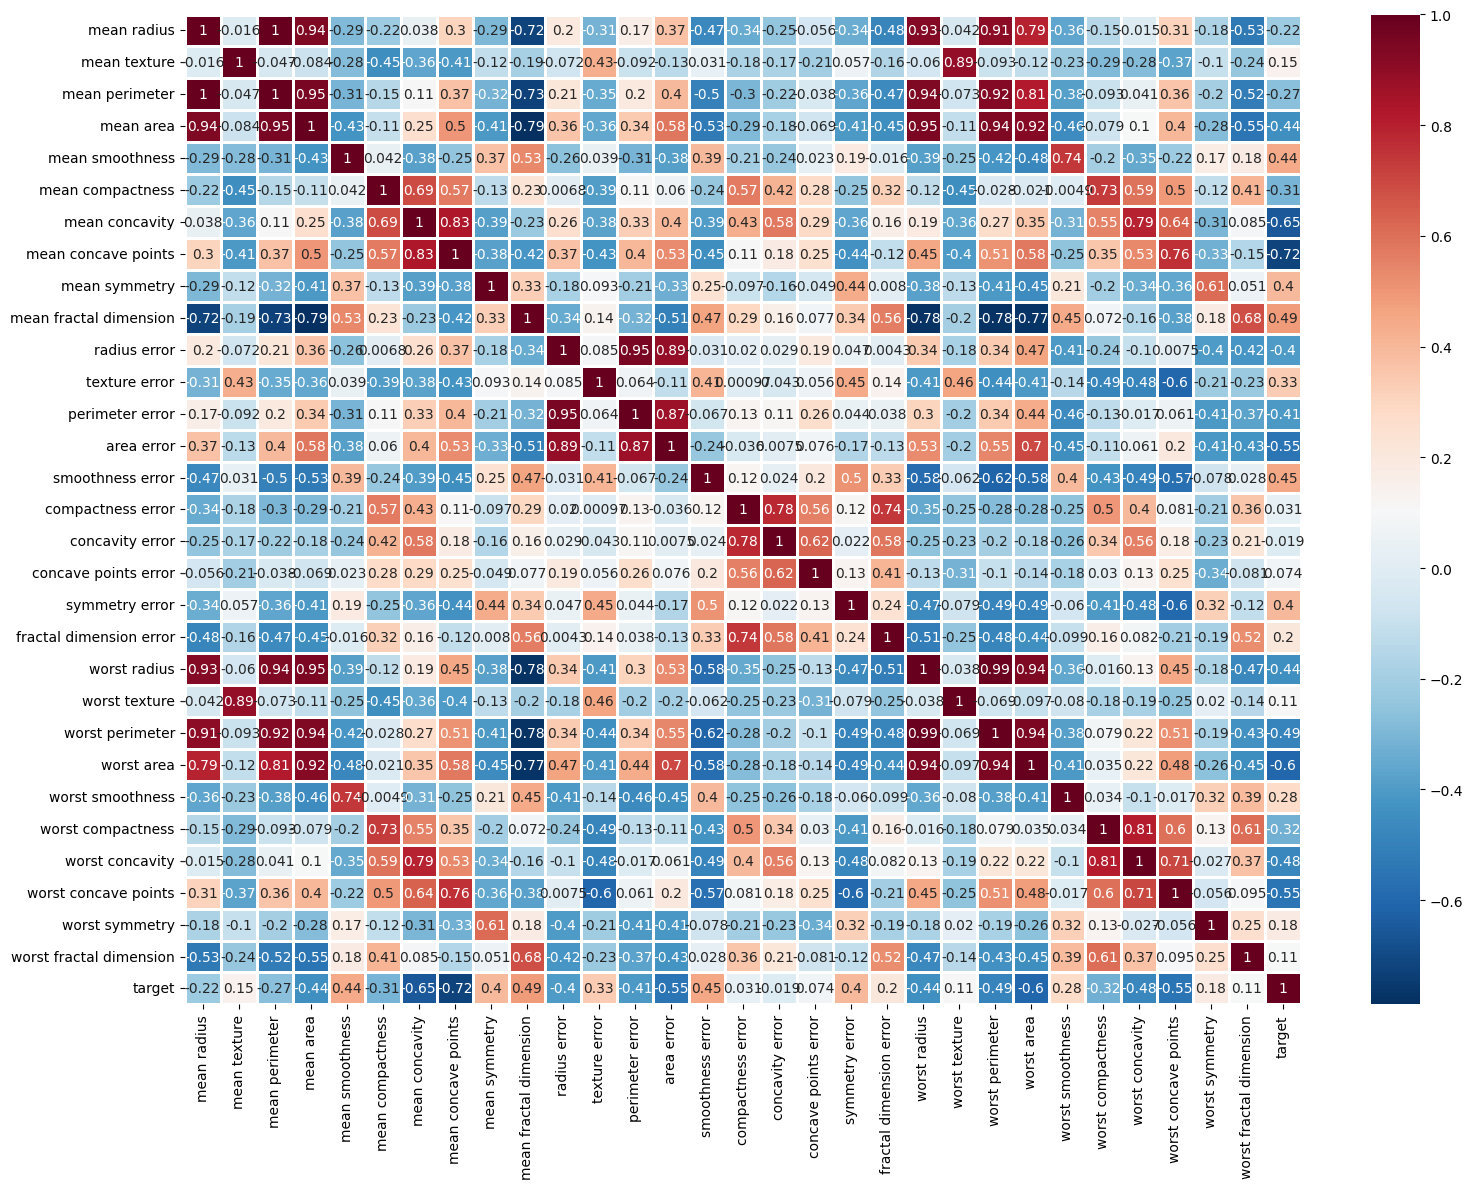

In [49]:
# Включення теплової карти кореляції допомагає зрозуміти взаємозв'язки між змінними, що може бути корисним для інтерпретації результатів кластеризації.

pearsoncorr = df_scaled.corr()

fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(pearsoncorr,
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=1)
fig.tight_layout()

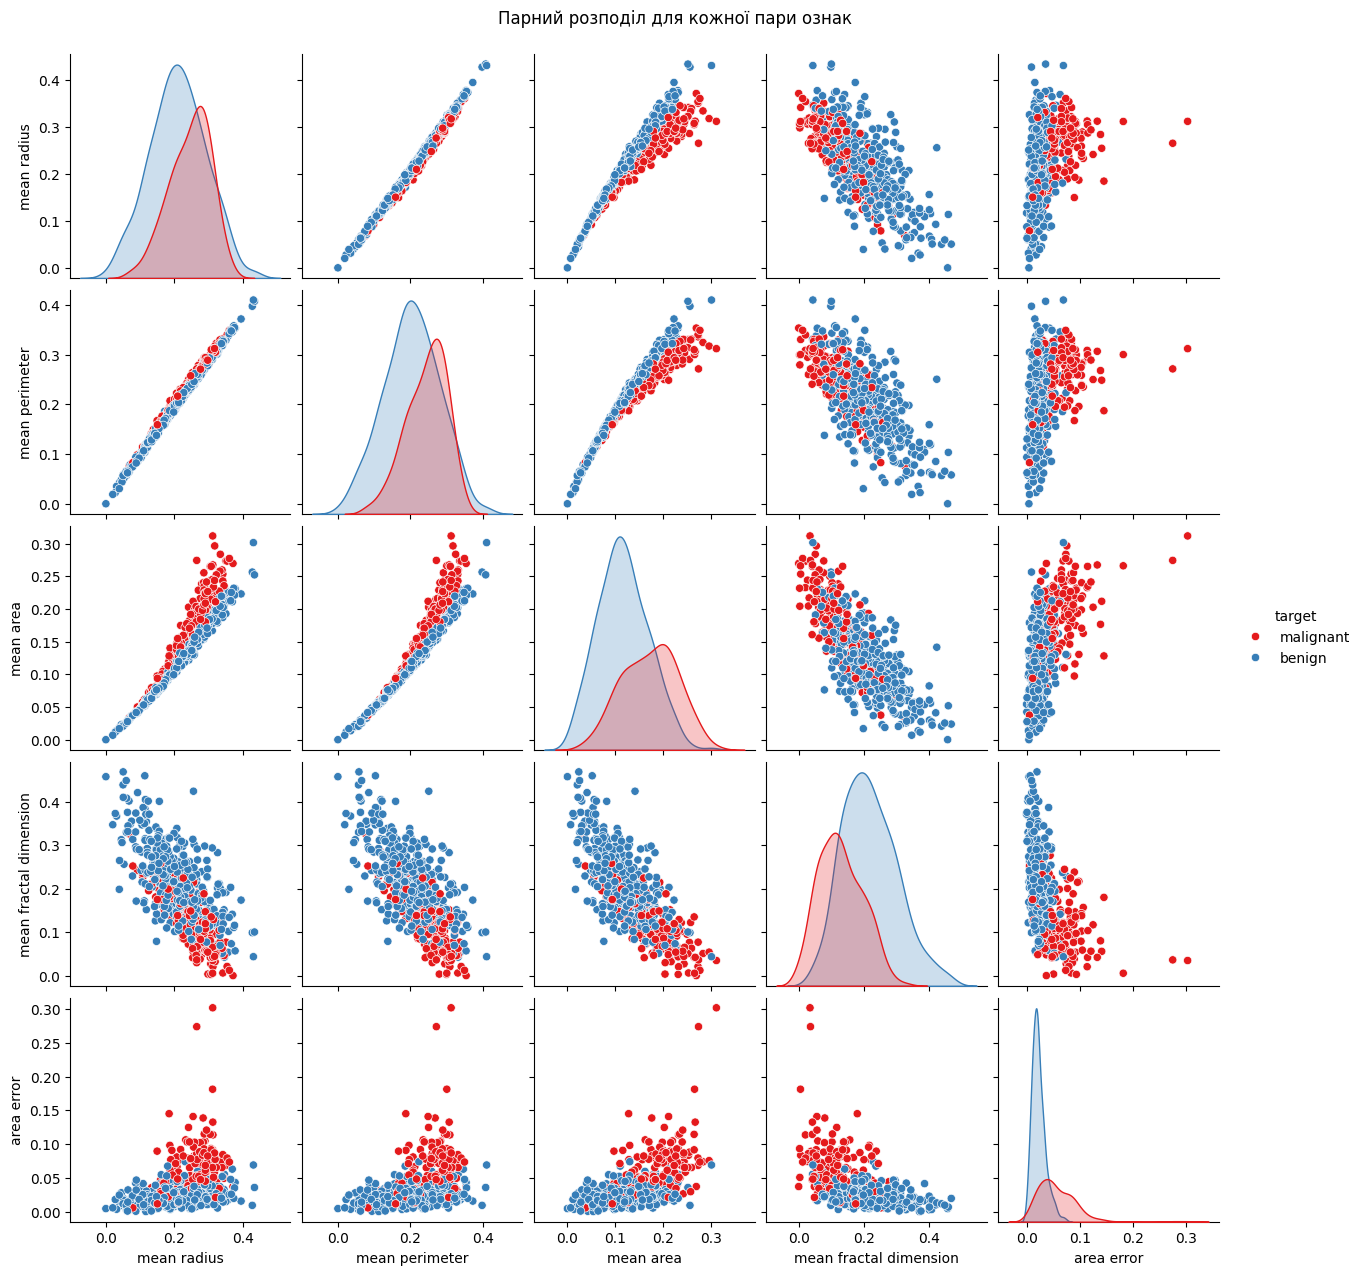

In [50]:
# 6. Побудуйте точкові діаграми: Використайте функцію pairplot() з бібліотеки seaborn для побудови точкових діаграм між усіма стовпцями.

#   ДОВГО РАХУЄ (13 хв.) і не кожен раз дораховує

import seaborn as sns
import matplotlib.pyplot as plt

# palette = {0: 'red', 1: 'green'}  # Визначення палітри кольорів
df_scaled['target'] = df_scaled['target'].map({0: 'malignant', 1: 'benign'})

# sns.pairplot(df_scaled, hue='target', diag_kind='kde', palette='Set1')

selected_features = ['mean radius', 'mean perimeter', 'mean area', 'mean fractal dimension', 'area error']  # Замініть цими назвами стовпців, які вас цікавлять
df_selected = df_scaled[selected_features + ['target']]  # Додайте 'target' для кольорового позначення

# Побудова точкових діаграм для вибраних ознак
sns.pairplot(df_selected, hue='target', diag_kind='kde', palette='Set1')

plt.suptitle('Парний розподіл для кожної пари ознак', y=1.02)
plt.show()

Спостерігаємо

Text(0.5, 1.0, 'Точкова діаграма датасету load_breast_cancer')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


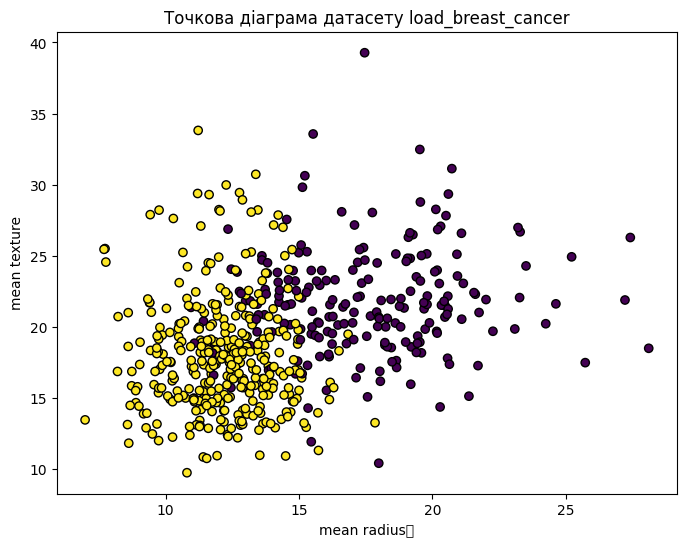

In [51]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from scipy.spatial.distance import euclidean, cityblock, minkowski, jaccard, hamming
import numpy as np


X = lbc.data
y = lbc.target

y = lbc.target

# Відображення точкової діаграми для перших двох ознак
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('mean radius	')
plt.ylabel('mean texture')
plt.title('Точкова діаграма датасету load_breast_cancer')

In [52]:
# 7. Обчисліть матриці відстаней: Використовуйте алгоритми та функції з конспекту для обчислення матриці відстаней для різних метрик: cityblock, cosine, euclidean, l1, manhattan.

from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import euclidean, cityblock, minkowski, jaccard, hamming
import numpy as np
import pandas as pd

# Prepare the data
X = df_scaled.drop(columns='target').values
y = df_scaled['target']

# Convert data to numpy array for distance calculations
# X = X.values

# Compute the number of samples
n_samples = X.shape[0]

# Initialize matrices for different distances
euclidean_matrix = np.zeros((n_samples, n_samples))
manhattan_matrix = np.zeros((n_samples, n_samples))
minkowski_matrix = np.zeros((n_samples, n_samples))
jaccard_matrix = np.zeros((n_samples, n_samples))
hamming_matrix = np.zeros((n_samples, n_samples))


# Встановлюємо поріг для бінаризації, яка потрібна для jaccard та hamming matrix
# Пробував без бінаризації, ркезультати практично такі ж тільки 0.2 а не 0.5
threshold = 0.5
binary_X = (X >= threshold).astype(int)

# Обчислення матриць відстаней
for i in range(n_samples):
    for j in range(i, n_samples):
        # Обчислюємо різні метрики відстаней
        euclidean_distance = euclidean(X[i], X[j])
        manhattan_distance = cityblock(X[i], X[j])
        minkowski_distance = minkowski(X[i], X[j], p=3)

        # Jaccard і Hamming мають сенс тільки для бінарних даних
        jaccard_similarity = np.nan
        hamming_distance = np.nan
        if np.all(binary_X[i] >= 0) and np.all(binary_X[j] >= 0):  # Переконайтеся, що дані є бінарними
            jaccard_similarity = jaccard(binary_X[i], binary_X[j])  # Jaccard Similarity = 1 - Jaccard Distance
            hamming_distance = hamming(binary_X[i], binary_X[j])

        # Fill matrices
        euclidean_matrix[i, j] = euclidean_distance
        euclidean_matrix[j, i] = euclidean_distance

        manhattan_matrix[i, j] = manhattan_distance
        manhattan_matrix[j, i] = manhattan_distance

        minkowski_matrix[i, j] = minkowski_distance
        minkowski_matrix[j, i] = minkowski_distance

        jaccard_matrix[i, j] = jaccard_similarity
        jaccard_matrix[j, i] = jaccard_similarity

        hamming_matrix[i, j] = hamming_distance
        hamming_matrix[j, i] = hamming_distance

print("Euclidean Distance Matrix:")
print(euclidean_matrix)
print("\nManhattan Distance Matrix:")
print(manhattan_matrix)
print("\nMinkowski Distance Matrix:")
print(minkowski_matrix)
print("\nJaccard Similarity Matrix:")
print(jaccard_matrix)
print("\nHamming Distance Matrix:")
print(hamming_matrix)

Euclidean Distance Matrix:
[[0.         0.5114167  0.31926451 ... 0.60708816 0.33204381 1.08735777]
 [0.5114167  0.         0.30253475 ... 0.41628329 0.47003888 1.05115289]
 [0.31926451 0.30253475 0.         ... 0.36908484 0.25596005 1.01043159]
 ...
 [0.60708816 0.41628329 0.36908484 ... 0.         0.35783885 0.83815794]
 [0.33204381 0.47003888 0.25596005 ... 0.35783885 0.         0.93557574]
 [1.08735777 1.05115289 1.01043159 ... 0.83815794 0.93557574 0.        ]]

Manhattan Distance Matrix:
[[0.         2.33576131 1.29793753 ... 2.35154885 1.19373122 4.73010076]
 [2.33576131 0.         1.34716574 ... 1.69572594 2.04880466 4.61239935]
 [1.29793753 1.34716574 0.         ... 1.30507327 1.17749421 4.63174436]
 ...
 [2.35154885 1.69572594 1.30507327 ... 0.         1.4662204  4.02965588]
 [1.19373122 2.04880466 1.17749421 ... 1.4662204  0.         4.40159164]
 [4.73010076 4.61239935 4.63174436 ... 4.02965588 4.40159164 0.        ]]

Minkowski Distance Matrix:
[[0.         0.32466715 0.219

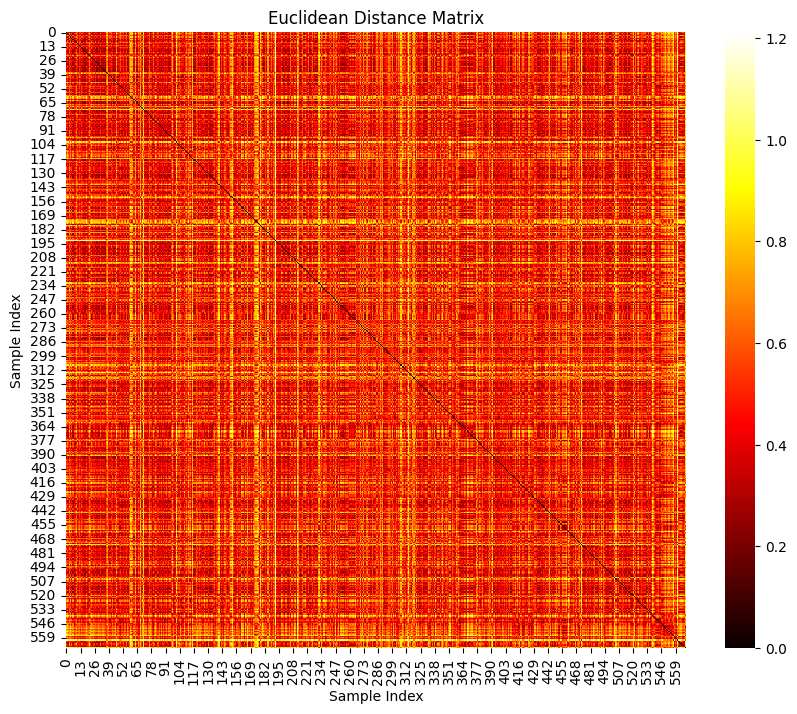

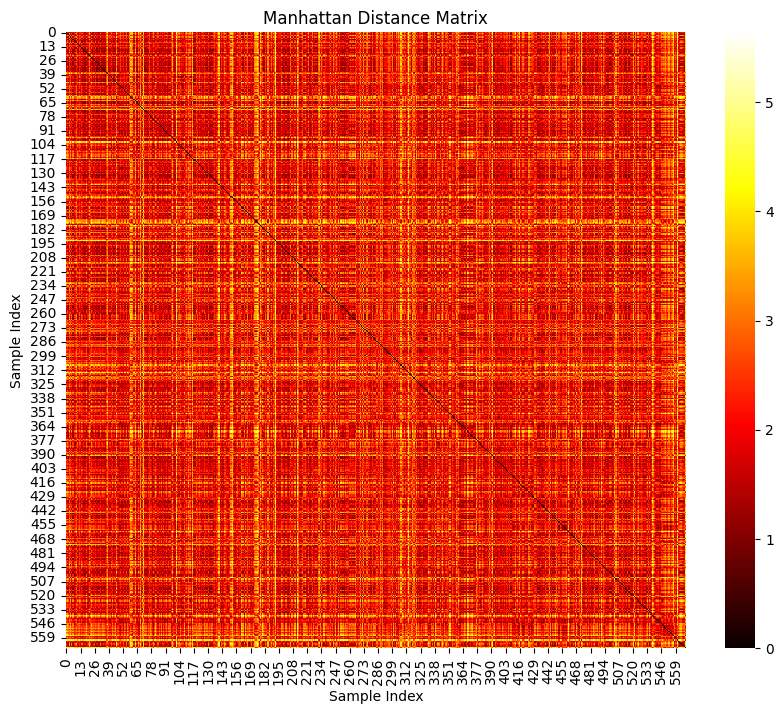

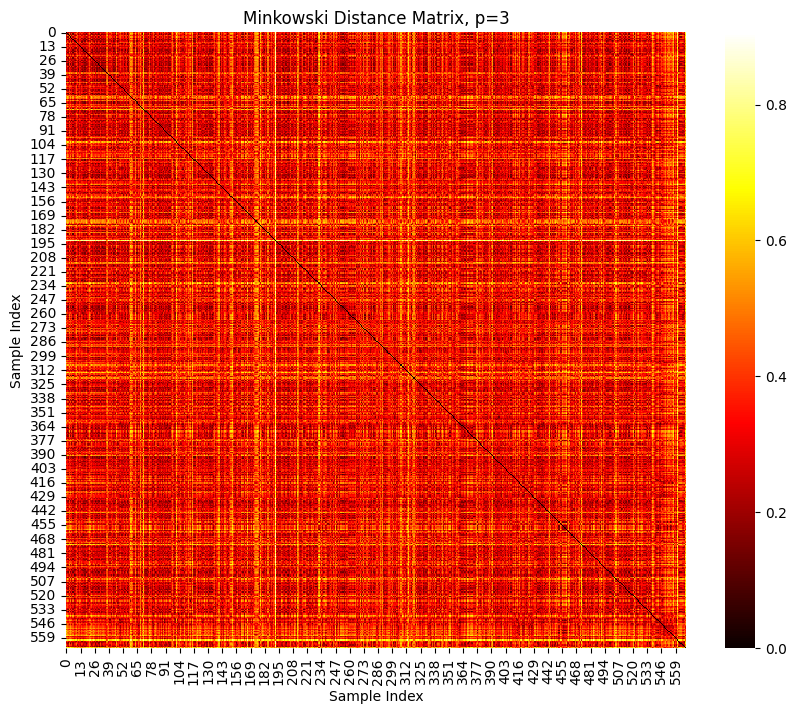

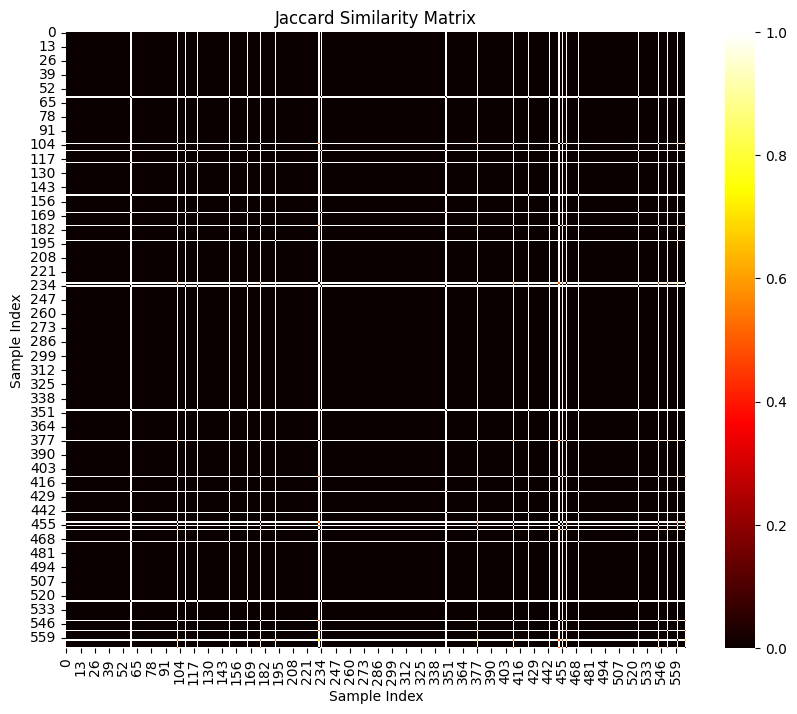

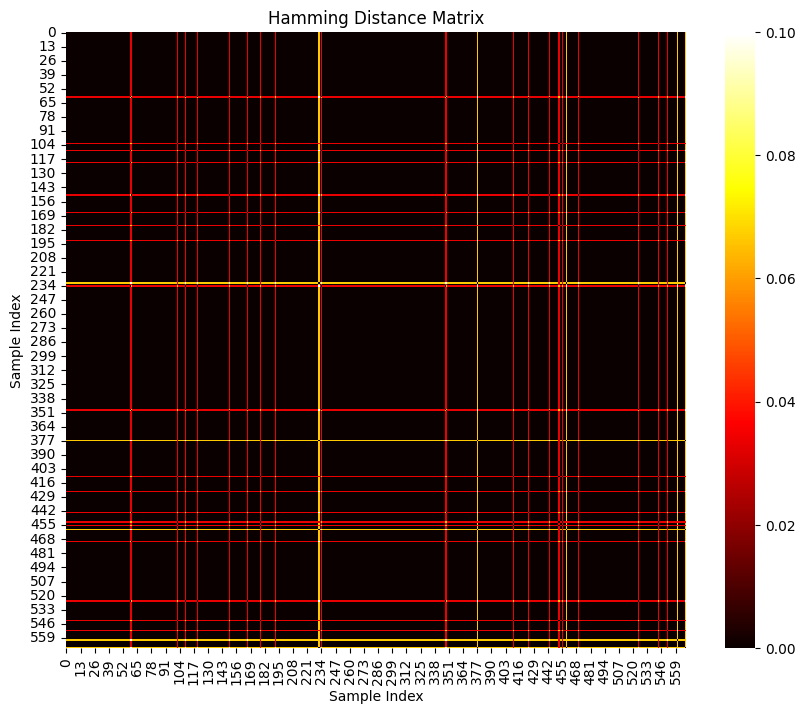

In [53]:
# 8. Візуалізуйте отримані матриці: Використайте функцію heatmap з бібліотеки seaborn або інші методи візуалізації для представлення отриманих матриць відстаней.
import matplotlib.pyplot as plt

# # Відобразимо матрицю подібностей як теплову мапу
# def plot_heatmap(matrix, title):
#     plt.figure(figsize=(10, 8))
#     plt.imshow(matrix, cmap='hot', interpolation='nearest')
#     plt.colorbar()
#     plt.title(title)
#     plt.xlabel('Зразки')
#     plt.ylabel('Зразки')
#     plt.show()

# Function to plot heatmap
def plot_heatmap(matrix, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix, cmap='hot')
    plt.title(title)
    plt.xlabel('Sample Index')
    plt.ylabel('Sample Index')
    plt.show()

# Plot each distance matrix
plot_heatmap(euclidean_matrix, 'Euclidean Distance Matrix')
plot_heatmap(manhattan_matrix, 'Manhattan Distance Matrix')
plot_heatmap(minkowski_matrix, 'Minkowski Distance Matrix, p=3')
plot_heatmap(jaccard_matrix, 'Jaccard Similarity Matrix')
plot_heatmap(hamming_matrix, 'Hamming Distance Matrix')

На основі аналізу візуалізованих матриць відстаней у вигляді теплових карт, можна зробити такі висновки:

1. Евклідова та Мінковського Відстані:
 *   Візуалізація: Обидві матриці мають червону сітку з жовтими полосками. Це означає, що більшість відстаней між зразками знаходяться в межах від 0.15 до 0.30, з кількома більшими відстанями, які відображаються жовтими полосками.
 *   Інтерпретація: Така структура може вказувати на те, що більшість зразків у даному наборі даних схожі, а жовті полоси можуть вказувати на групи зразків, які значно відрізняються один від одного. Це свідчить про потенційні кластери в даних.
2. Манхеттенська Відстань:
 *   Візуалізація: Подібно до евклідової відстані, манхеттенська матриця має червону сітку з жовтими полосками, але з більшими значеннями (від 0.3 до 0.7).
 *   Інтерпретація: Вища величина манхеттенських відстаней може свідчити про те, що різниці між зразками по кожній осі (координаті) накопичуються за рахунок особливості підрахунку.
3. Коефіцієнт Жаккара:
 *   Візуалізація: Чорна плоскість вказує на велику різницю векторів, повну відсутність схожості (нульові значення коефіцієнта Жаккара), а невелика кількість білих полосок (зі значенням 0.5) свідчать про те, що між деякими векторами спільні значення становлять 50% від усіх можливих значень, що вказує на те, що зразки мають значну схожість, але не є повністю ідентичними..
 *   Інтерпретація: Це свідчить про те, що переважна більшість зразків мають дуже низьку схожість, що може бути очікувано, оскільки Жаккар працює на бінаризованих даних. Білі полоски можуть вказувати на зразки з певними спільними характеристиками.
4. Відстань Хеммінга:
 *   Візуалізація: Відображається подібно до коефіцієнта Жаккара, з чорною плоскістю та білими полосками. Крім того спостерігалась більш висока кореляція на тепловій карті та значно помітніша ктастерізація в обраних точкових діаграмах.
 *   Інтерпретація: Відстань Хеммінга, яка вимірює кількість відмінностей у відповідних позиціях, показує, що більшість зразків мають повнісью різні характеристики. Білі полоски можуть вказувати на зразки з 33% схожості.

5. Цікаві результати були в експарименті без нормалізації після стандартизації та minmax:
 *   Візуалізація: Евклідова, Манхеттенська та Мінковського Відстані залишилися схожими, Коефіцієнт Жаккара став переважно білим, з діапозоном (0-1),  Відстань Хеммінга - стала від чорної до червоної (0 - 0.7)
 *   Інтерпретація: Це показує що без номалізації даних алгоритми Жаккара та Хеммінга знаходять більше схожих векторів (Коефіцієнт Жаккара навіть занадто)

## Висновки:
*   Евклідова та Мінковського Відстані: Ці метрики підходять для аналізу даних з нормально розподіленими ознаками та відносно стійкі до шуму. Вони виявляють групи схожих зразків у даних.
*   Манхеттенська Відстань: Корисна для даних, що містять викиди, і дозволяє виявити відмінності між зразками на основі сумарних абсолютних різниць.
*   Коефіцієнт Жаккара та Відстань Хеммінга: Найбільш підходять для аналізу бінарних або дискретних ознак, де важливо визначити спільні чи відмінні ознаки між зразками.
*    Відсутність нормалізації після стандартизації та масштабування дозволила метрикам Жаккара та Хеммінга знаходити більше схожих векторів. Для Жаккара це навіть призвело до значного зростання значень схожості, оскільки різниця в довжині векторів не була усунена нормалізацією.

Обираючи метрику відстані для аналізу набору даних, слід враховувати природу даних та специфічні завдання, які потрібно вирішити. Кожна метрика має свої переваги та недоліки, які можуть впливати на результати кластеризації або класифікації.